In [339]:
# library load

## 분석 툴
import pandas as pd

## 시각화 툴
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

##한글설정
import matplotlib.font_manager as fm

font_dirs = ['/Users/Dacon/AppData/Local/Microsoft/Windows/Fonts', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)
    
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
# "axes.unicode_minus" : 마이너스가 깨질 것을 방지

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

## warnings 무시
import warnings
warnings.filterwarnings(action='ignore')

## 결과 확인을 용이하게 하기 위해 실행하는 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [340]:
# pwd

In [341]:
# data load
train = pd.read_csv('C:\\Users\\son beom su\\Desktop\\의류생산성 예측pro\\train.csv') # 모델 학습 파일
test = pd.read_csv('C:\\Users\\son beom su\\Desktop\\의류생산성 예측pro\\test.csv') # 모델 시험지 파일
submission = pd.read_csv('C:\\Users\\son beom su\\Desktop\\의류생산성 예측pro\\sample_submission.csv') #답안지 파일 ; 제출 파일 형식

In [342]:
""""""* ID:                        고유 id
* quarter:                   한 달을 5그룹으로 나누어 나타낸 열
* department:                부서      (범주형)
* day:                       요일      (범주형)
* targeted_productivity:     기관(Authority)이 매일 팀 별로 설정한 목표 생산성.
* smv:                       작업에 할당된 시간(분)
* wip:                       진행 중이거나 미완성인 품목 수 
* over_time:                 각 팀의 초과 근무 시간(분)
* incentive:                 인센티브 양
* idle_time:                 생산이 중단된 시간
* idle_men:                  생산 중단으로 인해 유휴 상태인 근로자 수
* no_of_style_change:        특정 제품의 스타일 변경 횟수
* no_of_workers:             팀 별 작업자 수""""""

SyntaxError: illegal target for annotation (1361623728.py, line 1)

In [343]:
print('<train> head')
train.head(3)

<train> head


,ID,quarter,department,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,TRAIN_0000,Quarter1,sweing,Thursday,0.80,26.16,1108,0.27315,98,0,0,0,59,0.94073
1,TRAIN_0001,Quarter1,finishing,Thursday,0.75,3.94,1190,0.03704,0,0,0,0,8,0.88650
2,TRAIN_0002,Quarter1,sweing,Thursday,0.80,11.41,968,0.14120,50,0,0,0,30,0.80057


In [344]:
print('<train> tail')
train.head(3)

<train> tail


,ID,quarter,department,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,TRAIN_0000,Quarter1,sweing,Thursday,0.80,26.16,1108,0.27315,98,0,0,0,59,0.94073
1,TRAIN_0001,Quarter1,finishing,Thursday,0.75,3.94,1190,0.03704,0,0,0,0,8,0.88650
2,TRAIN_0002,Quarter1,sweing,Thursday,0.80,11.41,968,0.14120,50,0,0,0,30,0.80057


In [345]:
train_cols = train.columns.values
test_cols = test.columns.values

f'train cols 길이 : {len(train_cols)}'
f'test cols 길이 : {len(test_cols)}'

'train cols 길이 : 14'

'test cols 길이 : 13'

In [346]:
train.shape
test.shape

(1197, 14)

(818, 13)

In [347]:
# 결측값 존재 x 
print('[train] info')
train.info()

[train] info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   int64  
 7   over_time              1197 non-null   float64
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   int64  
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   int64  
 13  actual_productivity    1197 non-null   float64
dtypes: float64(4), int64(6), object(4)
memory u

In [348]:
train.isnull().sum()

ID                       0
quarter                  0
department               0
day                      0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [349]:
print('<train> describe')
train.describe()

<train> describe


,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.269006,0.176214,38.210526,0.727652,0.369256,0.150376,34.551378,0.735091
std,0.097891,10.943219,1395.647280,0.129197,160.182643,12.709094,3.268987,0.427848,22.152559,0.174488
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233710
25%,0.700000,3.940000,970.000000,0.055560,0.000000,0.000000,0.000000,0.000000,9.000000,0.650310
50%,0.750000,15.260000,1190.000000,0.152780,0.000000,0.000000,0.000000,0.000000,34.000000,0.773330
75%,0.800000,24.260000,1190.000000,0.268520,50.000000,0.000000,0.000000,0.000000,57.000000,0.850250
max,0.800000,54.560000,23122.000000,1.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120440


In [350]:
# 부서 2개로 나눠져 있음

train['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

In [351]:
# 기관(Authority)이 매일 팀 별로 설정한 목표 생산성에서 mean이 0.7인데 최솟값이 0.07임 확인 필요

train['targeted_productivity'].describe()

count    1197.000000
mean        0.729632
std         0.097891
min         0.070000
25%         0.700000
50%         0.750000
75%         0.800000
max         0.800000
Name: targeted_productivity, dtype: float64

<AxesSubplot:xlabel='targeted_productivity', ylabel='Count'>

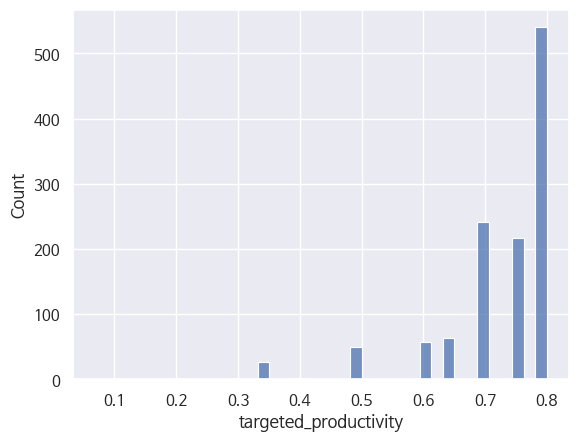

In [352]:
sns.histplot(x=train['targeted_productivity'])

In [353]:
# 0.07값 확인
# incentive	idle_time	idle_men no_of_style_change 
train[train['targeted_productivity']==0.07]

# 타 데이터와 비교했을때에 actual_productivity이 0.5임에 이상함
# 

,ID,quarter,department,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
633,TRAIN_0633,Quarter1,sweing,Thursday,0.07,24.26,1608,0.26852,0,0,0,0,58,0.52284


In [354]:
# 목표생산량은 실제생산량과 가장 관련이 있다고 생각되기에 0.52284의 유사한 값들의 평균 값으로 대체 

train[(train['actual_productivity'] >= 0.5) & (train['actual_productivity'] < 0.6)].targeted_productivity.mean()

0.6496428571428571

In [355]:
# 값 대체 코드
train.loc[train['targeted_productivity'] == 0.070000 , 'targeted_productivity'] = 0.64964

In [356]:
train['wip'].isnull

<bound method Series.isnull of 0       1108
1       1190
2        968
3        968
4       1170
        ... 
1192    1190
1193    1190
1194    1190
1195    1190
1196    1190
Name: wip, Length: 1197, dtype: int64>

In [357]:
train.isnull().sum()

ID                       0
quarter                  0
department               0
day                      0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [358]:
## describe로 보는 것 보다는 하나하나 확인하는게 더 보기 편할거 같아 열마다 value_counts 및 describe()로 확인 

# 5주차가 적으니까 당연히 적음
train['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [359]:
fig = plt.figure(figsize = (15,10))

<Figure size 1500x1000 with 0 Axes>

In [360]:
train.columns

Index(['ID', 'quarter', 'department', 'day', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [361]:
target = 'actual_productivity'

In [362]:
train[target]

0       0.94073
1       0.88650
2       0.80057
3       0.80057
4       0.80038
         ...   
1192    0.62833
1193    0.62562
1194    0.62562
1195    0.50589
1196    0.39472
Name: actual_productivity, Length: 1197, dtype: float64

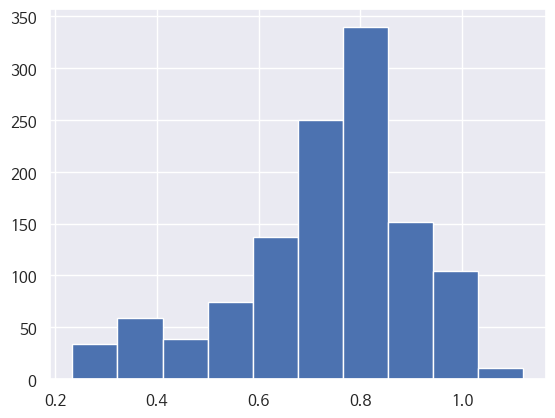

In [363]:
_ = plt.hist(train.actual_productivity, 10) # histogram : 빈도를 보는 그래프

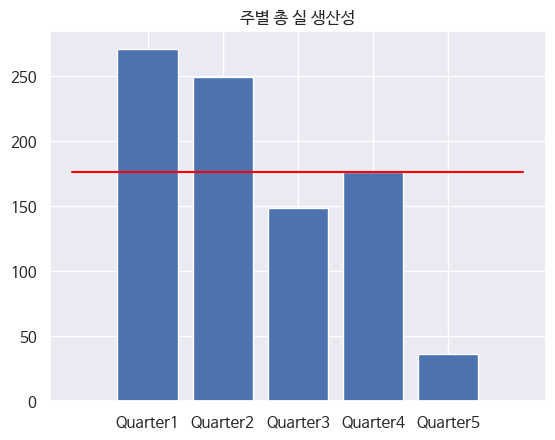

In [364]:
tmp = train.groupby('quarter').sum()[target]
_ = plt.bar(x = tmp.index, height = tmp.values)
_ = plt.plot([-1,len(tmp)], [tmp.values.mean(),tmp.values.mean()], color = 'red')
_ = plt.title('주별 총 실 생산성')

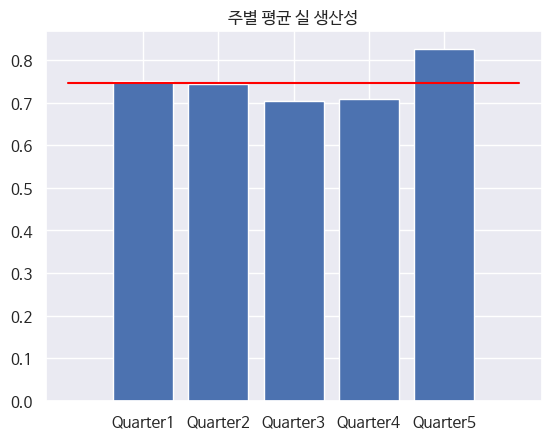

In [365]:
tmp = train.groupby('quarter').mean()[target]
_ = plt.bar(x = tmp.index, height = tmp.values)
_ = plt.plot([-1,len(tmp)], [tmp.values.mean(),tmp.values.mean()], color = 'red')
_ = plt.title('주별 평균 실 생산성')

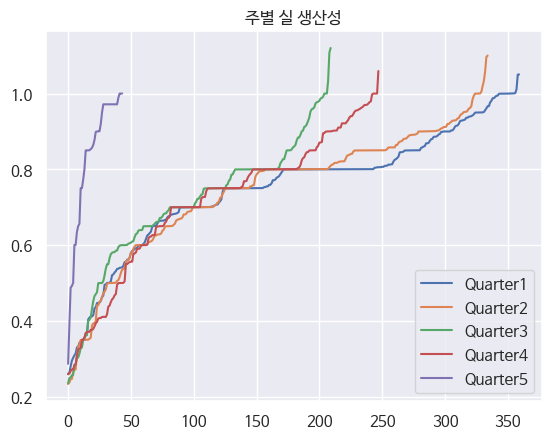

In [366]:
def quarter(num):
    tmp = train[train.quarter==f'Quarter{num}'][target].reset_index(drop = True)
    tmp.sort_values(inplace = True)
    tmp.reset_index(drop = True, inplace = True)
    return tmp

tmp1 = quarter(1)
_ = tmp1.plot()
# _ = plt.scatter(tmp.index, tmp.values)

tmp2 = quarter(2)
_ = tmp2.plot()

tmp3 = quarter(3)
_ = tmp3.plot()

tmp4 = quarter(4)
_ = tmp4.plot()

tmp5 = quarter(5)
_ = tmp5.plot()

_ = plt.title('주별 실 생산성')
_ = plt.legend(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'])


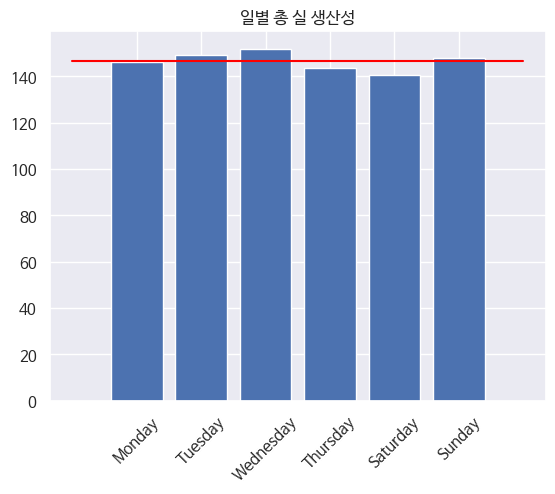

In [367]:
tmp = train.groupby('day').sum()[[target]]
day2num = {i:enu for enu, i in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday'])}
tmp['num'] = tmp.index.map(day2num)
tmp.sort_values('num', inplace = True)

_ = plt.bar(x = tmp.index, height = tmp[target])
_ = plt.plot([-1,len(tmp)], [tmp[target].mean(),tmp[target].mean()], color = 'red')

_ = plt.xticks(rotation = 45)
_ = plt.title('일별 총 실 생산성')

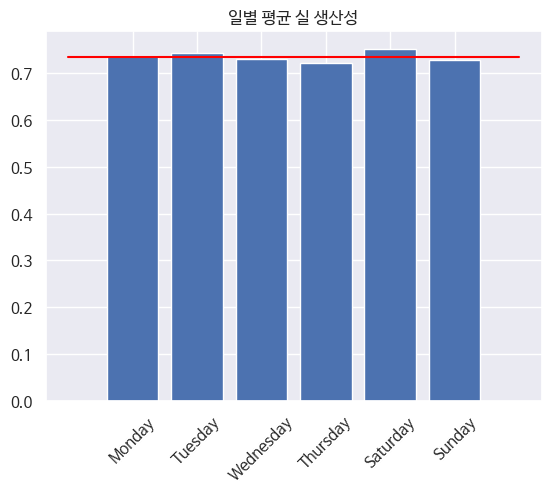

In [368]:
tmp = train.groupby('day').mean()[[target]]
day2num = {i:enu for enu, i in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday'])} # 'Friday', 
tmp['num'] = tmp.index.map(day2num)
tmp.sort_values('num', inplace = True)

_ = plt.bar(x = tmp.index, height = tmp[target])
_ = plt.plot([-1,len(tmp)], [tmp[target].mean(),tmp[target].mean()], color = 'red')

_ = plt.xticks(rotation = 45)
_ = plt.title('일별 평균 실 생산성')

In [369]:
train.groupby('department').sum()[target]

department
finishing    380.99299
sweing       498.91090
Name: actual_productivity, dtype: float64

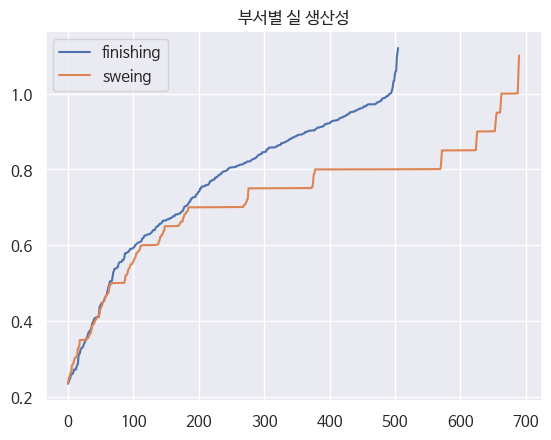

In [370]:
_ = train[train.department=='finishing'][target].sort_values().reset_index(drop = True).plot()
_ = train[train.department=='sweing'][target].sort_values().reset_index(drop = True).plot()

_ = plt.title('부서별 실 생산성')
_ = plt.legend(['finishing', 'sweing'])

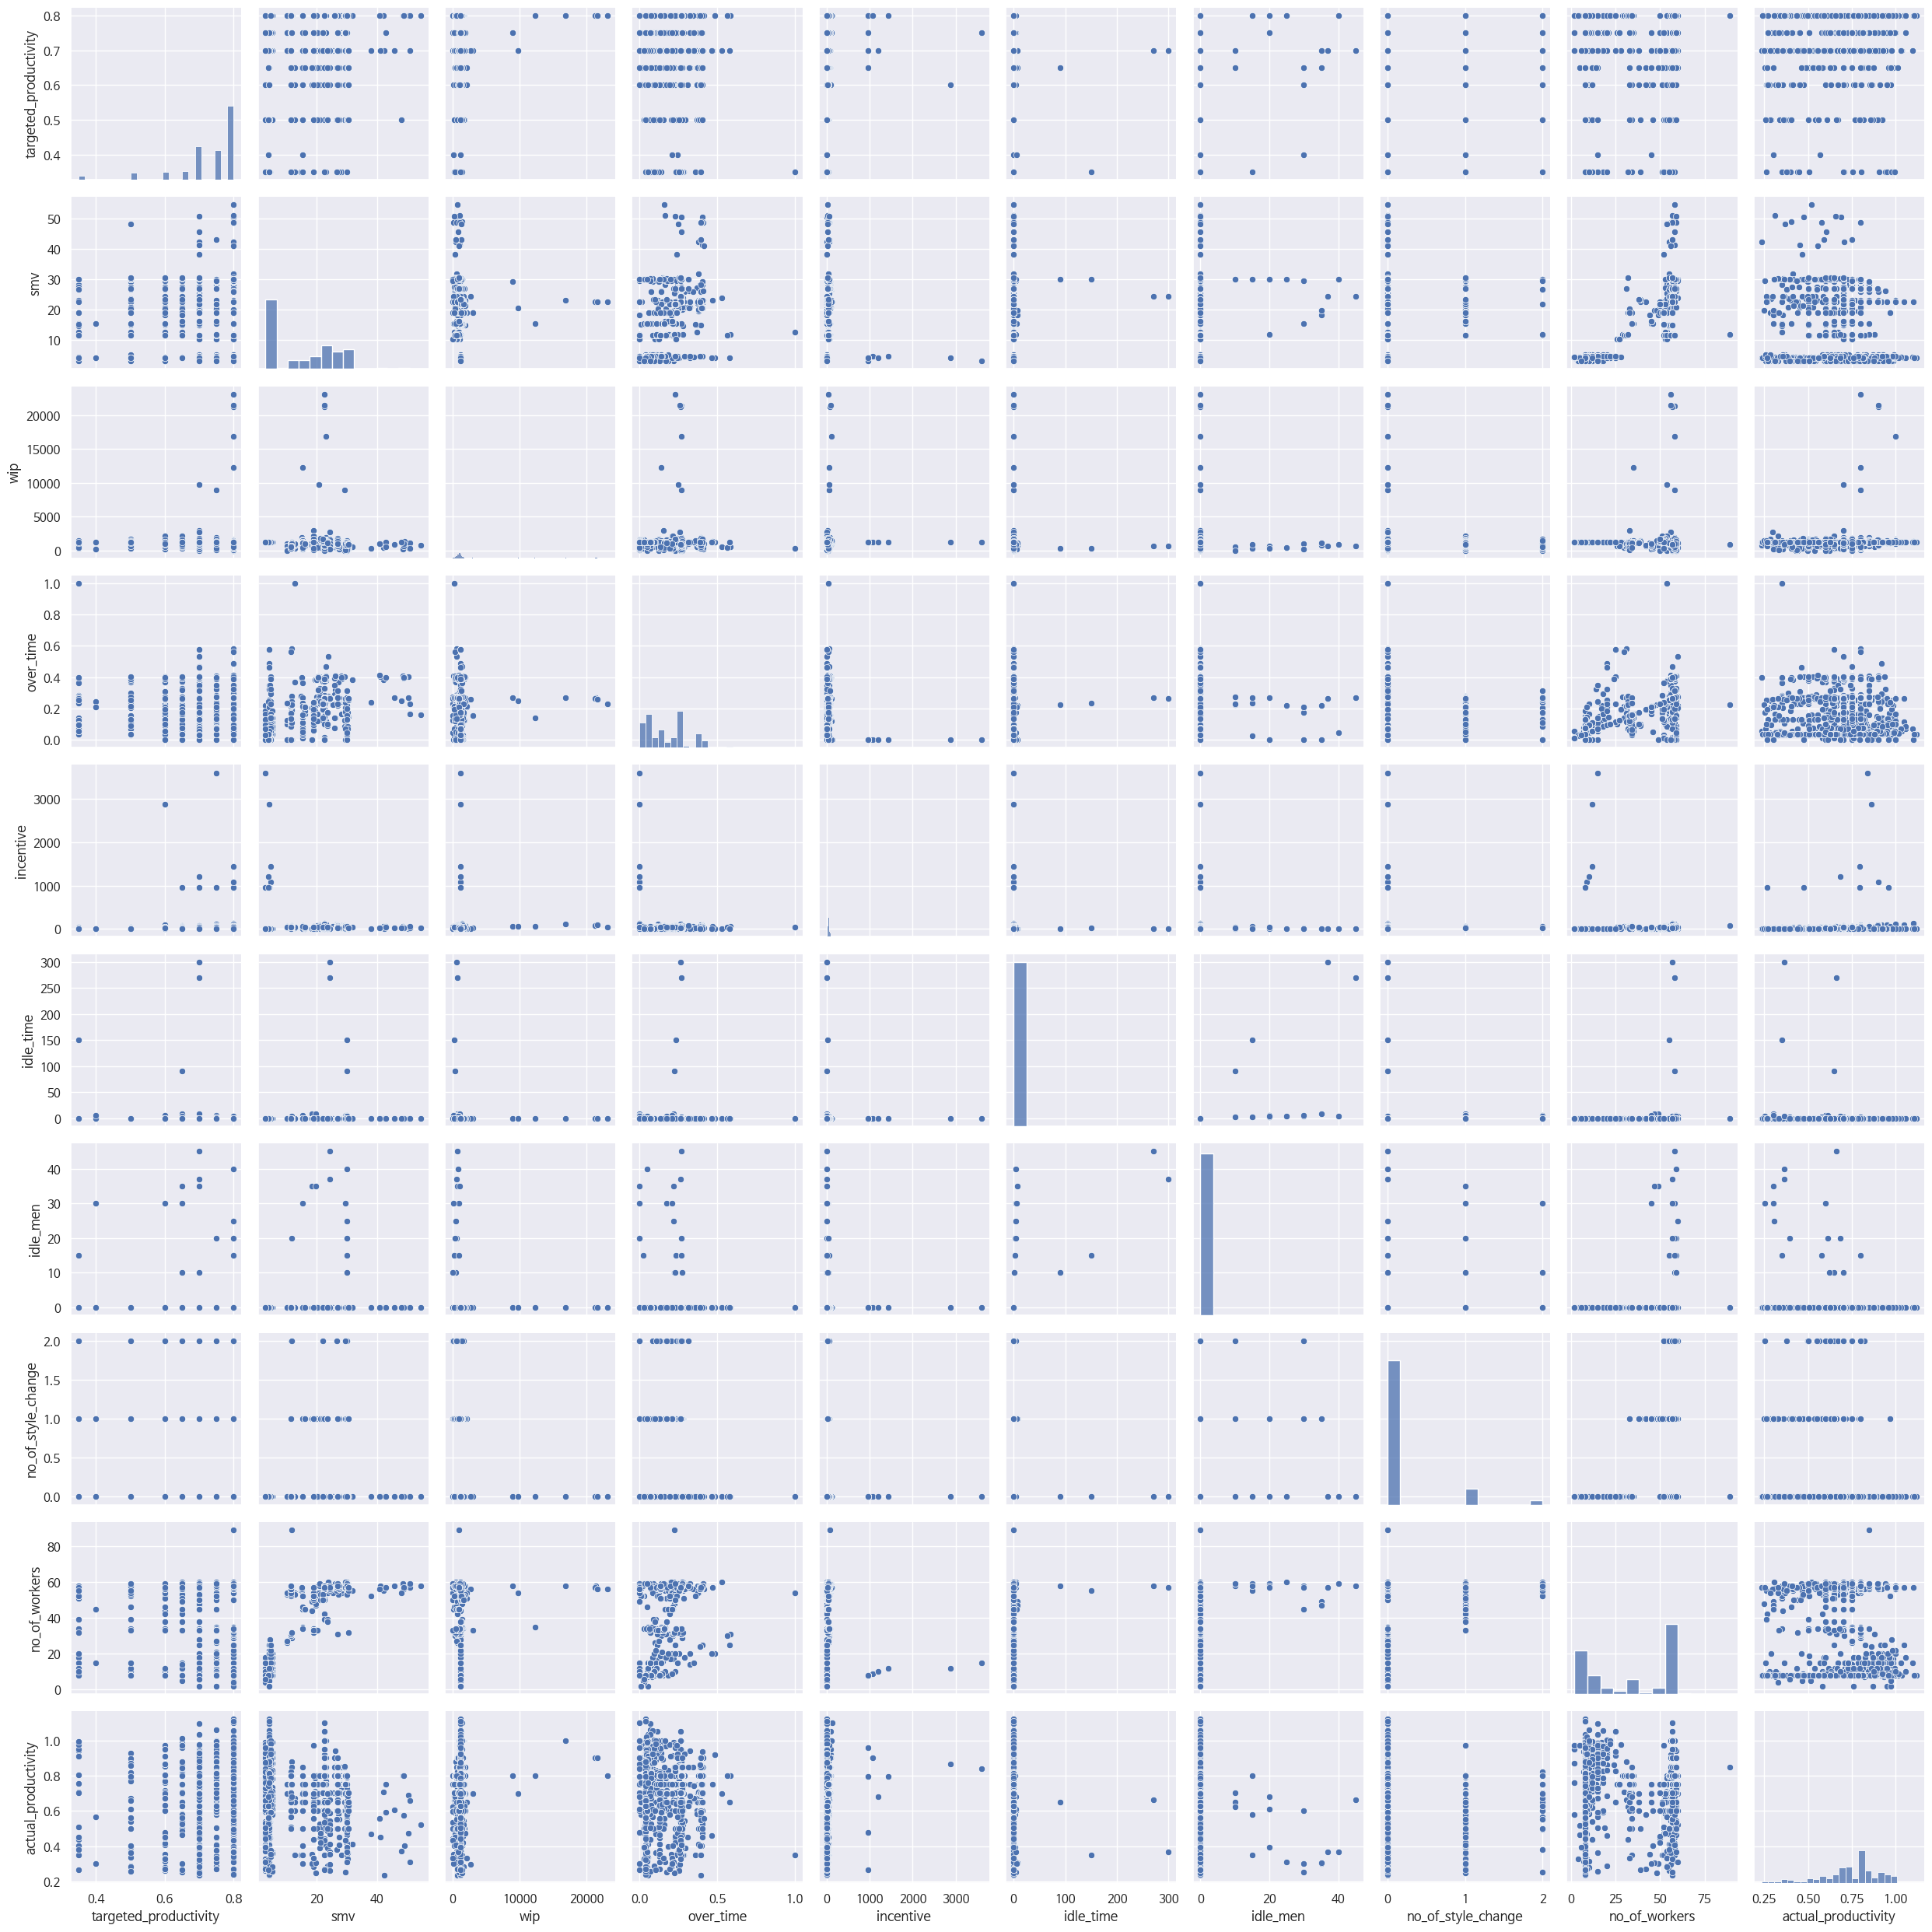

In [371]:
## 산점도 행렬 파악

import matplotlib.pyplot as plt
import seaborn as sns

cols=['targeted_productivity','smv','wip','over_time','incentive','idle_time','idle_men', 'no_of_style_change','no_of_workers','actual_productivity']
sns.pairplot(train[cols], height=2.5)
plt.tight_layout()
plt.show()

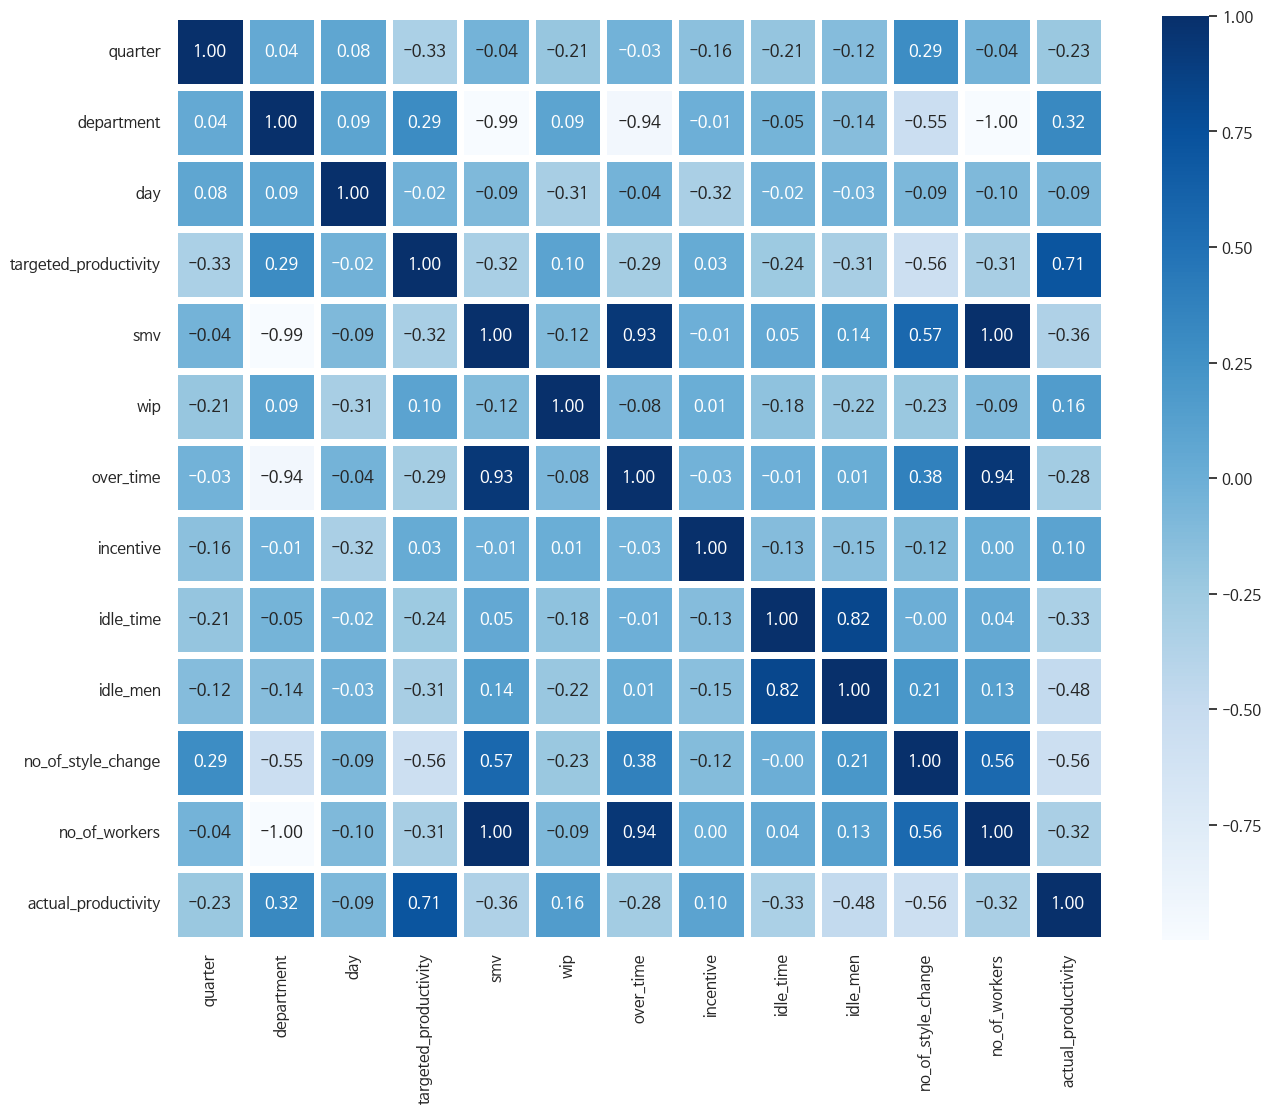

In [372]:
## 문자형으로 된 범주형 데이터를 수치형으로 바꿔야 히트맵 그릴 수 있음.
train_df = train.copy()

quarter2num = {i:enu for enu, i in enumerate(train_df.quarter.unique())}
depart2num = {i:enu for enu, i in enumerate(train_df.department.unique())}
day2num = {i:enu for enu, i in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday'])} # 'Friday', 

train_df.quarter = train_df.quarter.map(quarter2num)
train_df.department = train_df.department.map(depart2num)
train_df.day = train_df.day.map(day2num)

corr = train_df.corr()
corr2 = corr.apply(lambda x : round(x,2))
_ = plt.figure(figsize = (15,12))
_ = sns.heatmap(corr2.corr(method = 'pearson'), # 상관관계
                annot = True, # 값 표시
                fmt = '.2f',
                linewidth = 5, # 나누는 선
                cmap = 'Blues') # 색상 팔레트

In [373]:
def vibox(var): # 양적변수
    _ = plt.figure(figsize = (5, 8))
    _ = plt.violinplot(var, data = train)
    _ = plt.boxplot(var, data = train)
    _ = plt.title(f'{var} 이상치 및 분포')

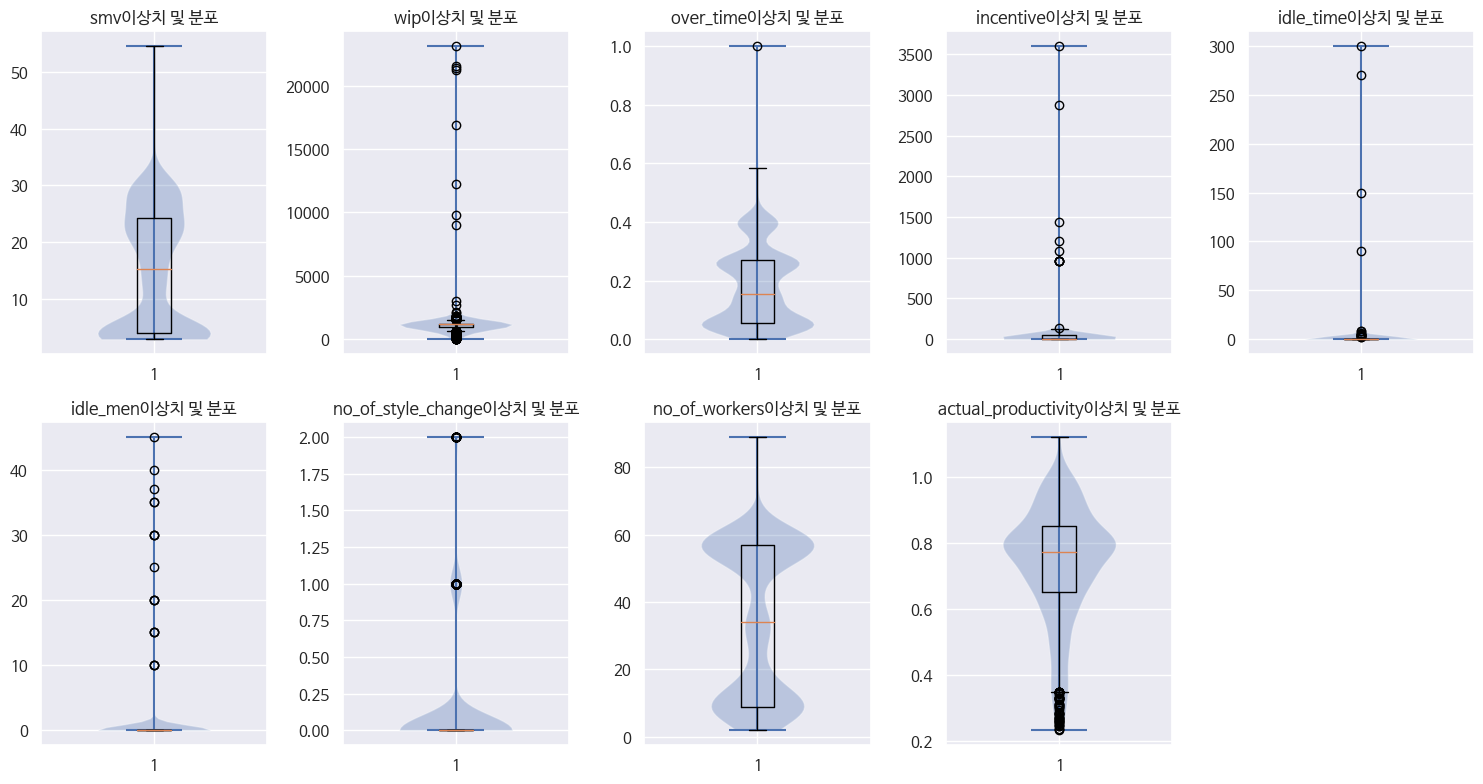

In [374]:
## for loop 밖에서 그림판 먼저 만들어주기
fig = plt.figure(figsize = (15, 8))
rows = 2
cols = 5
for enu,i in enumerate(train.columns[5:]):
    ax = fig.add_subplot(rows, cols, enu+1)
    # vibox(i)
    _ = ax.violinplot(i, data = train)
    _ = ax.boxplot(i, data = train)
    _ = ax.set_title(i + '이상치 및 분포')
plt.tight_layout()

<AxesSubplot:xlabel='targeted_productivity', ylabel='Count'>

<AxesSubplot:xlabel='smv', ylabel='Count'>

<AxesSubplot:xlabel='wip', ylabel='Count'>

<AxesSubplot:xlabel='over_time', ylabel='Count'>

<AxesSubplot:xlabel='incentive', ylabel='Count'>

<AxesSubplot:xlabel='idle_time', ylabel='Count'>

<AxesSubplot:xlabel='idle_men', ylabel='Count'>

<AxesSubplot:xlabel='no_of_style_change', ylabel='Count'>

<AxesSubplot:xlabel='no_of_workers', ylabel='Count'>

<AxesSubplot:xlabel='actual_productivity', ylabel='Count'>

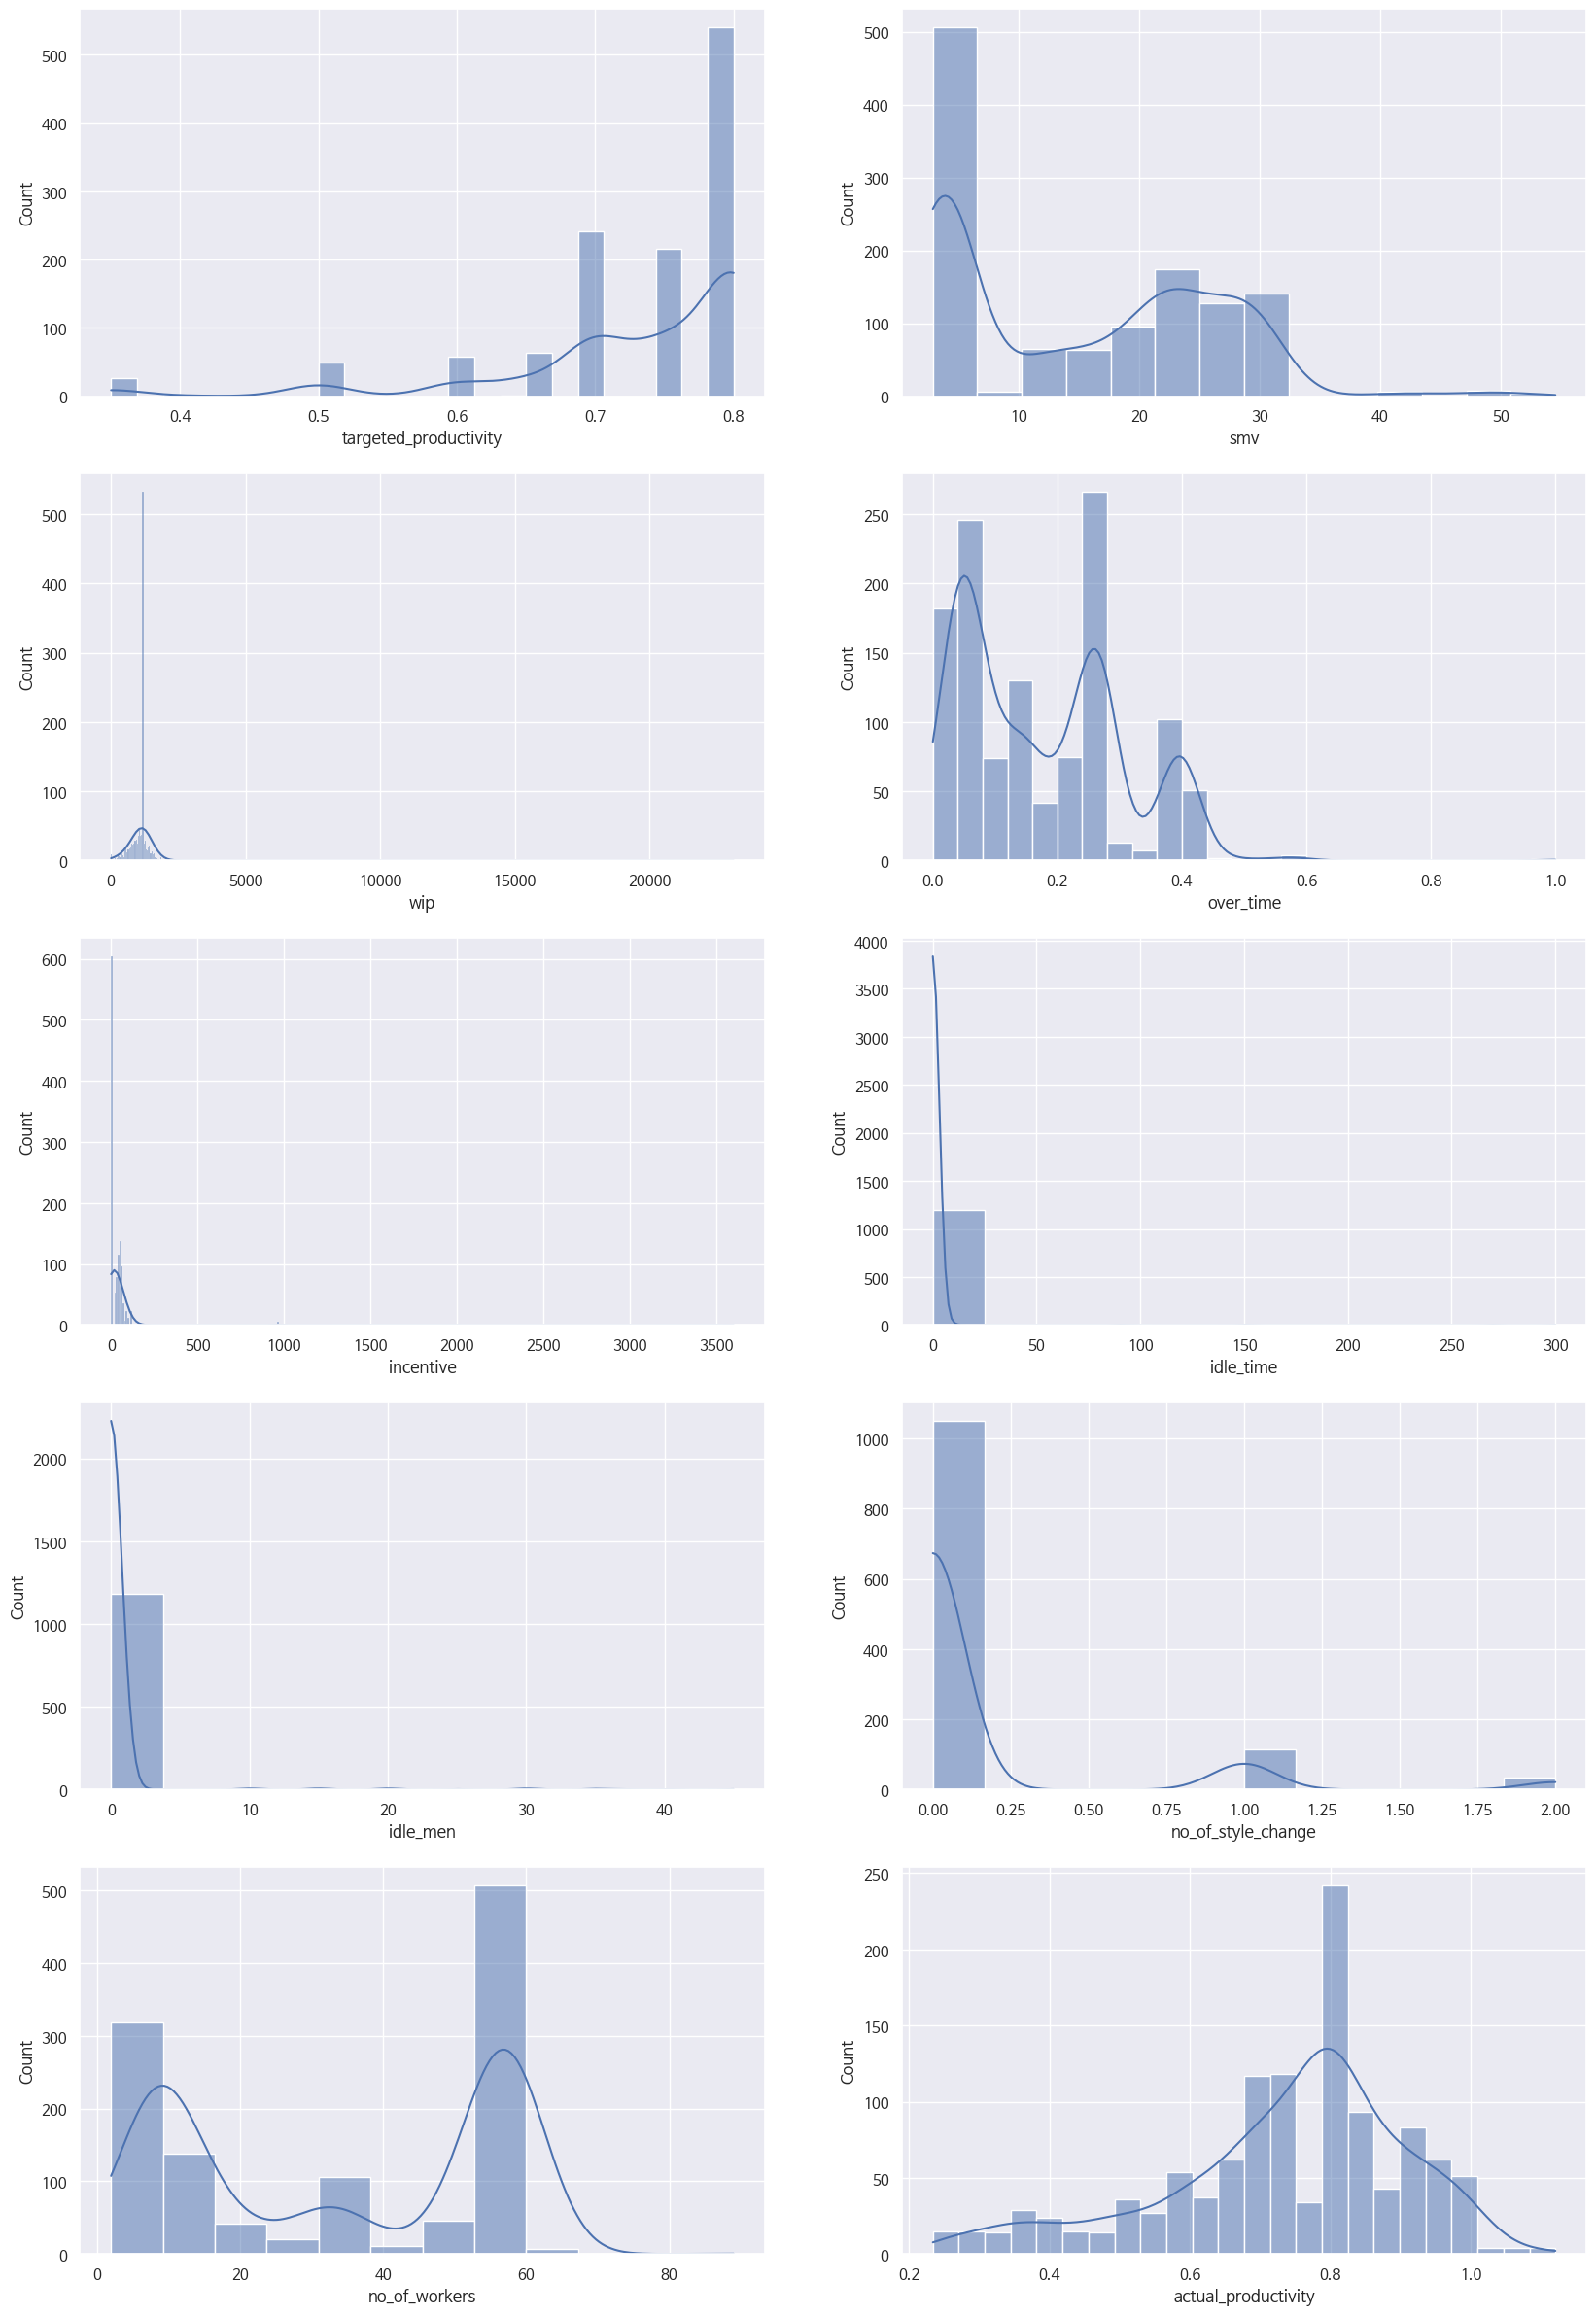

In [375]:
## 이상치 재확인: 대부분의 데이터에서 이상치 발견

fig, axes = plt.subplots(5, 2, figsize=(20,30))

sns.histplot(train['targeted_productivity'], ax=axes[0][0], kde = True)
sns.histplot(train['smv'], ax=axes[0][1], kde = True)
sns.histplot(train['wip'], ax=axes[1][0], kde = True)
sns.histplot(train['over_time'], ax=axes[1][1], kde = True)
sns.histplot(train['incentive'], ax=axes[2][0], kde = True)
sns.histplot(train['idle_time'], ax=axes[2][1], kde = True)
sns.histplot(train['idle_men'], ax=axes[3][0], kde = True)
sns.histplot(train['no_of_style_change'], ax=axes[3][1], kde = True)
sns.histplot(train['no_of_workers'], ax=axes[4][0], kde = True)
sns.histplot(train['actual_productivity'], ax=axes[4][1], kde = True)


plt.show()

<AxesSubplot:xlabel='targeted_productivity'>

<AxesSubplot:xlabel='smv'>

<AxesSubplot:xlabel='wip'>

<AxesSubplot:xlabel='over_time'>

<AxesSubplot:xlabel='incentive'>

<AxesSubplot:xlabel='idle_time'>

<AxesSubplot:xlabel='idle_men'>

<AxesSubplot:xlabel='no_of_style_change'>

<AxesSubplot:xlabel='no_of_workers'>

<AxesSubplot:xlabel='actual_productivity'>

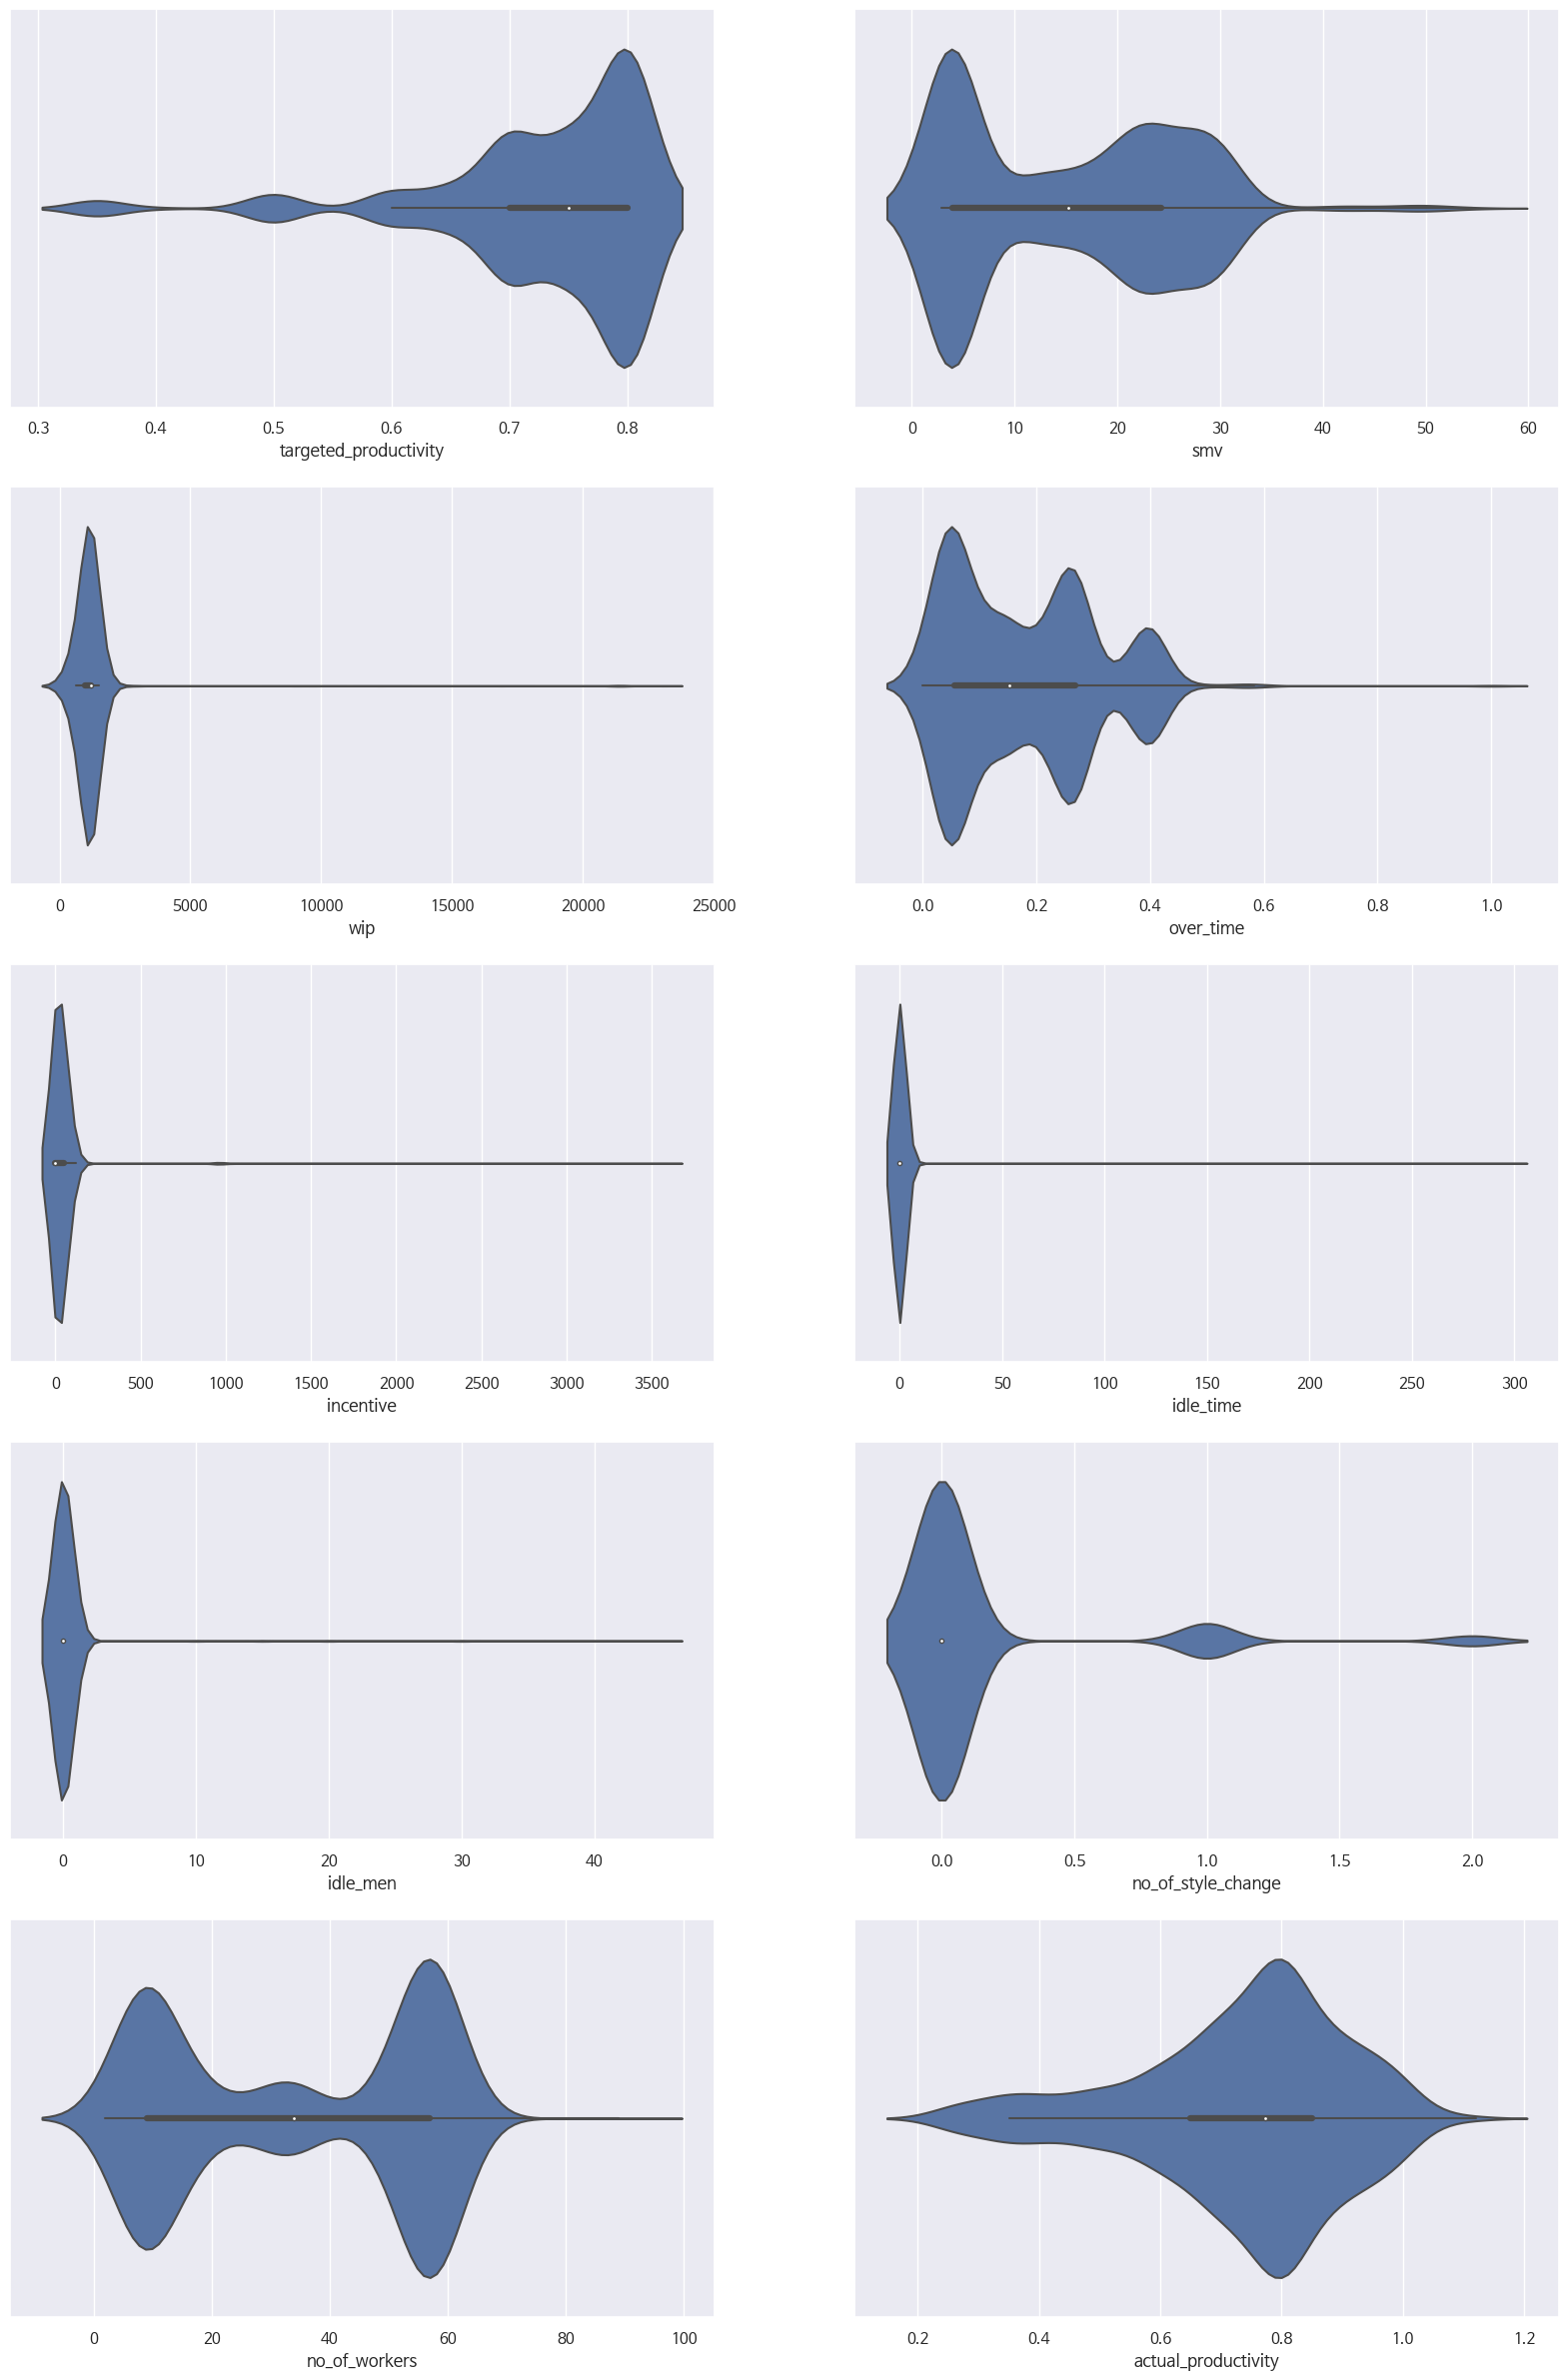

In [376]:
## Violin plot
# 해석: no_of_worker(팀 별 작업자 수)에서 쌍봉 정규분포 이에 따라서 많이 차이가 날 것이라고 생각됨

fig, axes = plt.subplots(5, 2, figsize=(20,30))

sns.violinplot(train['targeted_productivity'], ax=axes[0][0])
sns.violinplot(train['smv'], ax=axes[0][1])
sns.violinplot(train['wip'], ax=axes[1][0])
sns.violinplot(train['over_time'], ax=axes[1][1])
sns.violinplot(train['incentive'], ax=axes[2][0])
sns.violinplot(train['idle_time'], ax=axes[2][1])
sns.violinplot(train['idle_men'], ax=axes[3][0])
sns.violinplot(train['no_of_style_change'], ax=axes[3][1])
sns.violinplot(train['no_of_workers'], ax=axes[4][0])
sns.violinplot(train['actual_productivity'], ax=axes[4][1])

plt.show()

Text(0.5, 1.0, '팀별 작업자 수와 실 생산성의 관계')

Text(0.5, 0, 'worker')

Text(0, 0.5, 'TARGET')

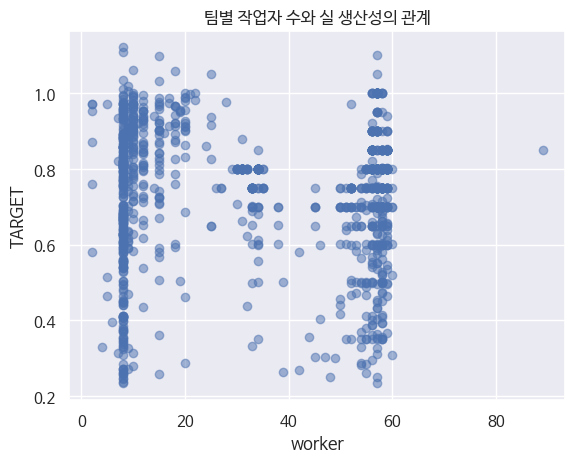

In [377]:
# 안내에서 말한 선형회귀 분석을 사용하기 위해서는 선형관계가 중요하기 때문에 확인해보기

X = train.no_of_workers.values
Y = train.actual_productivity.values

import matplotlib.pyplot as plt
plt.scatter(X, Y, alpha=0.5)
plt.title('팀별 작업자 수와 실 생산성의 관계')
plt.xlabel('worker')
plt.ylabel('TARGET')
plt.show()

In [378]:
## 모델링

"""이번 대회에서는 범주형 변수 수치화를 위해 이중 for문을 사용했습니다.
이는 train data로 fit한 Label Encoder로 test data를 transform할 경우,
train data에는 속하지 않은 데이터가 test data에 있을 가능성이 있어 에러가 발생할 수 있기 때문입니다.
이를 방지하기 위해 예외적인 상황에 대처할 수 있는 코드를 삽입해서 이중 for문을 작성했습니다.
참고해 주시기 바랍니다."""

'이번 대회에서는 범주형 변수 수치화를 위해 이중 for문을 사용했습니다.\n이는 train data로 fit한 Label Encoder로 test data를 transform할 경우,\ntrain data에는 속하지 않은 데이터가 test data에 있을 가능성이 있어 에러가 발생할 수 있기 때문입니다.\n이를 방지하기 위해 예외적인 상황에 대처할 수 있는 코드를 삽입해서 이중 for문을 작성했습니다.\n참고해 주시기 바랍니다.'

In [379]:
### linerRegression 기본적으로 책에 나와있는 내용을 기반으로 기본적인 코드부터 짜보는 것을 시작을 해보았습니다.

In [380]:
# 라이브러리

import pandas as pd
import random
import os
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [381]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [382]:
## Data Load

In [427]:
train_df = pd.read_csv('C:\\Users\\son beom su\\Desktop\\의류생산성 예측pro\\train.csv')

In [428]:
train_x = train_df.drop(columns=["ID", "actual_productivity"])
train_y = train_df["actual_productivity"]

In [429]:
test_x = pd.read_csv('C:\\Users\\son beom su\\Desktop\\의류생산성 예측pro\\test.csv').drop(columns=['ID'])

In [392]:
## 데이터 모델 구축을 위한 전처리

In [435]:
# NaN to mean
train_wip_mean = np.mean(train_x["wip"])
train_x = train_x.replace({'wip': np.nan}, train_wip_mean)
test_X = test_x.replace({'wip': np.nan}, train_wip_mean) # Test 'wip' 데이터의 평균으로 대체 시 Data Leakage이므로, Train 'wip' 데이터의 평균으로 결측치 대체합니다.


# qualitative to quantitative
qual_col = ['quarter','department','day']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    # Label Encoder가 Test 데이터로부터 Fitting되는 것은 Data Leakage이므로, Test 데이터에는 Train 데이터로 Fitting된 Label Encoder로부터 transform만 수행되어야 합니다.
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


In [436]:
## 선형회귀 모델

In [ ]:
# 그나마 선형성이 0.71로 높은 targeted_productivity으로 actual 예측
# 최소 제곱 선형 회귀 모델 구현
model = LinearRegression()


In [466]:
line_fitter = LinearRegression()
line_fitter.fit(X, y)

LinearRegression()

In [ ]:
y_predicted = line_fitter.predict(X)

In [468]:
line_fitter.fit(train['targeted_productivity'].values.reshape(-1,1), train['actual_productivity'])

LinearRegression()

In [469]:
preds=line_fitter.predict(X)

array([0.78886971, 0.7503922 , 0.78886971, ..., 0.67343718, 0.7503922 ,
       0.71191469])

In [463]:
from sklearn.preprocessing import StandardScaler

In [465]:
X= train[['targeted_productivity']].values # X를 2차원으로 만들기 위하여 [[]] 하였다.
y= train['actual_productivity'].values # y를 1차원으로 표시하기 위하여 []하였다.

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X) 
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()  
#p.newaxis를 넣음으로써 2차원으로 만들고
#.flatten()을 사용함으로써 다시 1차로 만들었다.
# help(fit_transform)을 함으로써 2차원만을 원소로 받는 이유를 알 수 있다.
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

NameError: name 'n_iter' is not defined

ValueError: x and y must have same first dimension, but have shapes (50,) and (0,)

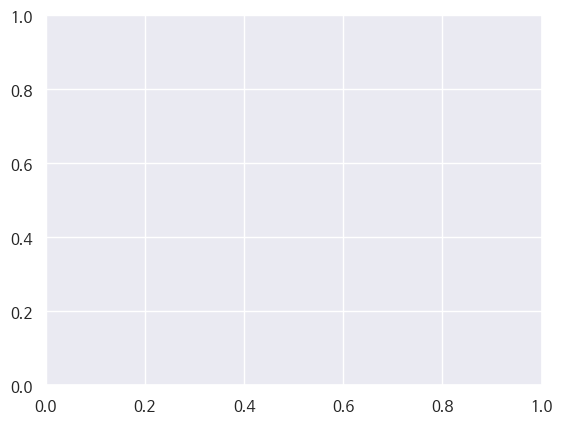

In [461]:
# 에포크 함수로 비용을 그래프로 그려보는 것이 좋다
# 알고리즘이 비용 함수의 최솟값으로 수렴하는지 확인할 수 있다

plt.plot(range(1, lr.n_iter +1),lr.cost_)
plt.ylabel("Sum_of_squre_of_error")
plt.xlabel("Epoch")
plt.show()